# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [294]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
year_index=[1992,1993,1994,1995]
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650).round(0), 
                   np.random.normal(43000,100000,3650).round(0), 
                   np.random.normal(43500,140000,3650).round(0), 
                   np.random.normal(48000,70000,3650).round(0)] 
                 ,index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8942.0,127789.0,-71888.0,-79146.0,425156.0,310681.0,50582.0,88349.0,185805.0,281287.0,...,171939.0,150651.0,203664.0,-377877.0,-197214.0,24185.0,-56827.0,-67320.0,113377.0,-4495.0
1993,-51896.0,198351.0,-123518.0,-129917.0,216119.0,49846.0,149136.0,62808.0,23366.0,-109686.0,...,-44567.0,101032.0,117648.0,160476.0,-13760.0,-37333.0,103020.0,179746.0,13455.0,34443.0
1994,152337.0,192947.0,389950.0,-93006.0,100819.0,5529.0,-32989.0,223943.0,-66722.0,47826.0,...,165086.0,74735.0,107330.0,199251.0,-36792.0,-71862.0,26375.0,-29328.0,65859.0,-91542.0
1995,-69708.0,-13290.0,-30178.0,55052.0,152884.0,12931.0,63700.0,64148.0,-29316.0,59646.0,...,-13901.0,50174.0,53966.0,4129.0,72203.0,39937.0,139472.0,59386.0,73362.0,28705.0


In [295]:
#df.index.values
df_1992_stats = df.loc[1992].apply([np.min, np.max, np.mean,np.std], axis=0)
df_1993_stats = df.loc[1993].apply([np.min, np.max, np.mean,np.std], axis=0)
df_1994_stats = df.loc[1994].apply([np.min, np.max, np.mean,np.std], axis=0)
df_1995_stats = df.loc[1995].apply([np.min, np.max, np.mean,np.std], axis=0)
year_mean = { 1992 : df_1992_stats['mean'],
                1993 : df_1993_stats['mean'],
                1994 : df_1994_stats['mean'],
                1995 : df_1995_stats['mean']}
print(year_mean)

{1992: 33312.110136986303, 1993: 41861.864109589042, 1994: 39493.304109589044, 1995: 47743.559178082192}


In [296]:
year_mean.values()

dict_values([33312.110136986303, 41861.864109589042, 39493.304109589044, 47743.559178082192])

In [297]:
df_1995_stats

amin   -189866.000000
amax    320827.000000
mean     47743.559178
std      69781.190390
Name: 1995, dtype: float64

In [298]:
from scipy import stats

In [299]:
marginError = {1992 : stats.sem(df.loc[[1992]],axis=1)[0],
                1993 : stats.sem(df.loc[[1993]],axis=1)[0],
                1994 : stats.sem(df.loc[[1994]],axis=1)[0],
                1995 : stats.sem(df.loc[[1995]],axis=1)[0]}

### Calculate Standard Error for each row of data 

In [300]:
## Calculate standard error for each years data
sqrt_sample_n = np.sqrt(len(df.columns))

### population standard deviation rather than the samples standard error, 
### so it will need to be converted to standard error by dividing by the square root of number of samples

y_err = {
        1992 : (1.96*year_mean[1992])/sqrt_sample_n,
        1993 : (1.96*year_mean[1993])/sqrt_sample_n,
        1994 : (1.96*year_mean[1994])/sqrt_sample_n,
        1995 : (1.96*year_mean[1995])/sqrt_sample_n
        }
y_err

{1992: 1080.7165016367076,
 1993: 1358.0889096027461,
 1994: 1281.2477288252317,
 1995: 1548.9037481697651}

In [301]:
%matplotlib notebook

import matplotlib.pyplot as plt

In [302]:
_1992 = df.loc[[1992]]
_1993 = df.loc[[1993]]
_1994 = df.loc[[1994]]
_1995 = df.loc[[1995]]
year_max = (df.loc[1992].max(), df.loc[1992].max(), df.loc[1994].max(), df.loc[1995].max())
year_min = (df.loc[1992].min(), df.loc[1992].min(), df.loc[1994].min(), df.loc[1995].min())
print(year_min,'\n',year_max)

(-717071.0, -717071.0, -450828.0, -189866.0) 
 (817506.0, 817506.0, 490092.0, 320827.0)


### build a bar graph with the dataframe content

In [312]:
from matplotlib import pyplot, cm
from numpy.random import randn

<IPython.core.display.Javascript object>


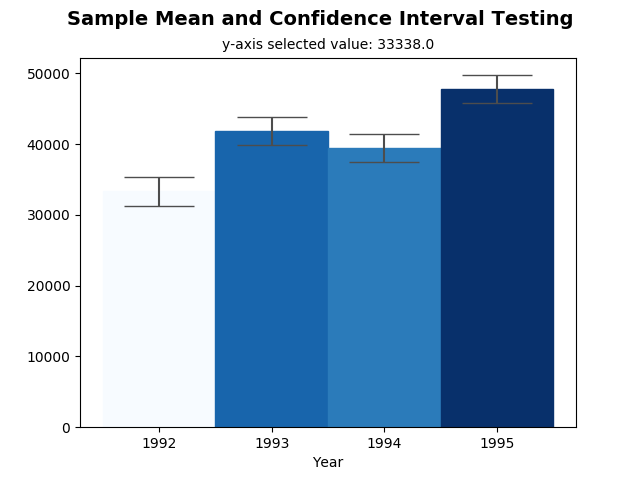

In [340]:
### Setup local variables to set the correct color gradient
reds = cm.Reds
blues = cm.Blues
nearest = 100
###

### Setup variables to render the plot
N = 4

ind = np.arange(N)  # the x locations for the groups
width = 1       # the width of the bars

fig, ax = plt.subplots()

bar_width = .5
opacity = 0.4

error_config = {'ecolor': '0.3'}


rects1 = ax.bar(ind, 
                year_mean.values(), 
                width, 
                color='grey', 
                yerr=y_err,
                error_kw=error_config,
                align='center',
                label="data_max",
                edgecolor='black',
                linewidth=1,
                capsize=25)

# add some text for labels, title and axes ticks

ax.set_xlabel('Year')
fig.suptitle("Sample Mean and Confidence Interval Testing",fontsize=14, fontweight='bold')

plt.xticks(ind, ('1992', '1993', '1994', '1995'))
ax.set_xticklabels(('1992', '1993', '1994', '1995'))

### Initialize a line object that can be accessed by the plot/onclick event handler
line = plt.axhline(10000, color='black')
colourColumns(10000)
ax.set_title("click on plot to select y-axis value", fontsize=10)

def onclick(event):
    #plt.cla()  ## Clearning the axes will render the entire plot w/o data
    
    ## Send ydata to function that will color the columns appropriately
    colourColumns(event.ydata) 
    # Refresh the plot
    fig.canvas.draw()
    return

def colourColumns(yVal):
    ### Set column(s) color based on y-axis value that the user has selected.
    ##  REQUIREMENTS:
    ##  dark blue for the distribution being certainly below this y-axis, 
    ##  white if the value is certainly contained
    ##  dark red if the value is certainly not contained as the distribution is above the axis
    line.set_data(([0,1],yVal))
    y2c = {1992 : 0, 1993 : 1, 1994 : 2, 1995 : 3}       
    ax.set_title("y-axis selected value: {0}".format(np.around(yVal)), fontsize=10)
    ### New color map ... defined as a DataFrame
    
    df_p = pd.DataFrame.from_dict(year_mean,orient='index')


    df_p['diff'] = nearest*((yVal-df_p[0])//nearest)

    #find the sign of each diff
    df_p['sign'] = df_p['diff'].abs()/df_p['diff']
    old_range = abs(df_p['diff']).min(), df_p['diff'].abs().max()
    new_range = .5,1

    #multiply it by the remapped values
    df_p['shade'] = df_p['sign']*np.interp(df_p['diff'].abs(),old_range,new_range)

    df_p['colour'] = df_p['shade'].apply(lambda x: 'white' if x==0 else 
                                               reds(abs(x)) if x > 0 else 
                                               blues(abs(x)))   
    
    ### Colors have been calculated.. now apply them to the bars
    for k,v in year_mean.items():
        c = y2c[k]
        rects1[c].set_color(df_p.loc[k]['colour'])
        
    fig.canvas.draw()
    return

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [317]:
np.arange(100, 0, -1).reshape(10, 10)

array([[100,  99,  98,  97,  96,  95,  94,  93,  92,  91],
       [ 90,  89,  88,  87,  86,  85,  84,  83,  82,  81],
       [ 80,  79,  78,  77,  76,  75,  74,  73,  72,  71],
       [ 70,  69,  68,  67,  66,  65,  64,  63,  62,  61],
       [ 60,  59,  58,  57,  56,  55,  54,  53,  52,  51],
       [ 50,  49,  48,  47,  46,  45,  44,  43,  42,  41],
       [ 40,  39,  38,  37,  36,  35,  34,  33,  32,  31],
       [ 30,  29,  28,  27,  26,  25,  24,  23,  22,  21],
       [ 20,  19,  18,  17,  16,  15,  14,  13,  12,  11],
       [ 10,   9,   8,   7,   6,   5,   4,   3,   2,   1]])